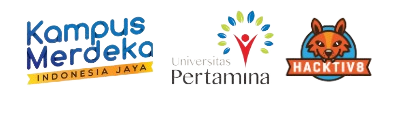

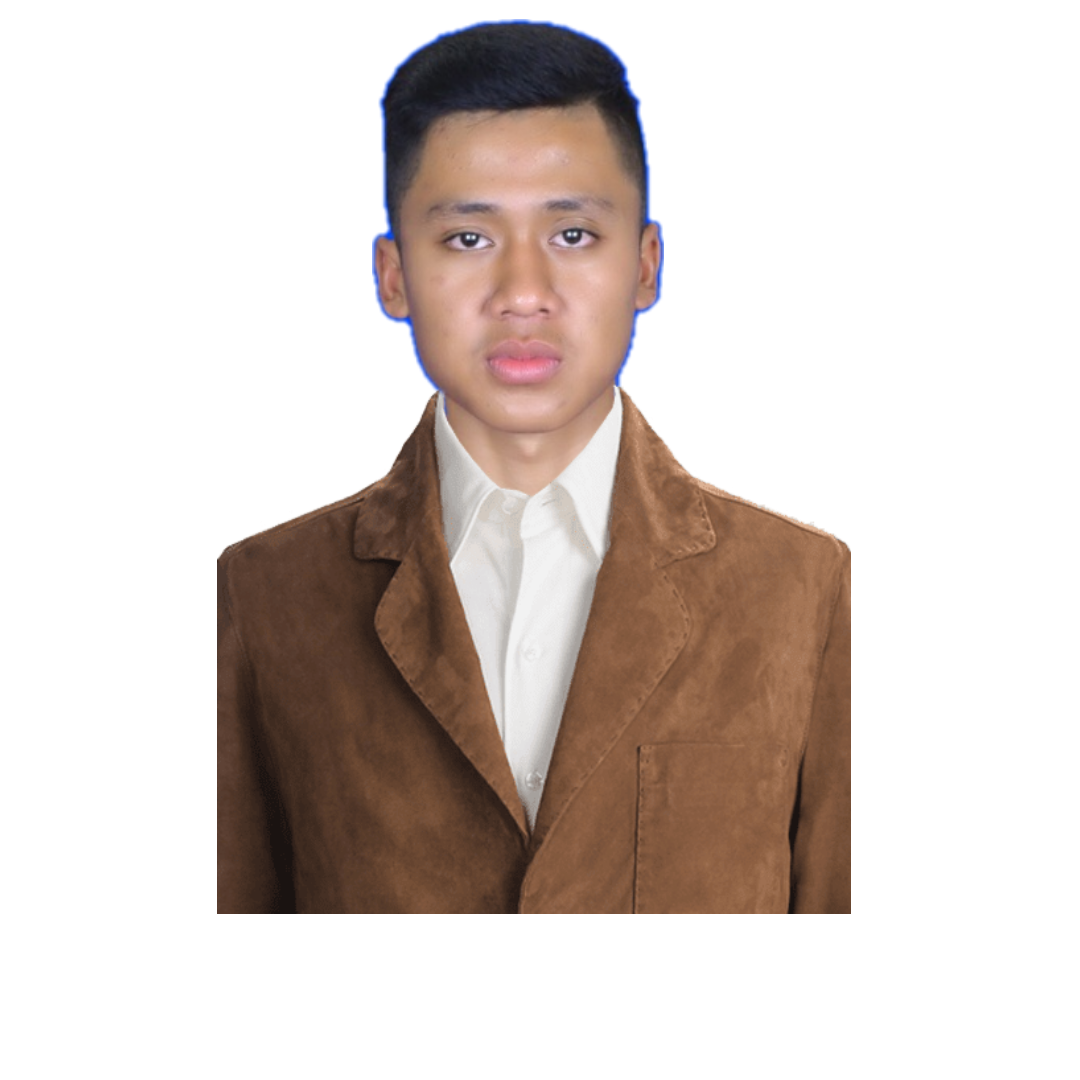

# Assignment 1 ( London Crime Data, 2008-2016 )
# Andreas Dimas Christanto 
# PYTN-KS-017
#### A goal without a plan is just a wish 

Pada assignment 1, Data diambil dari kaggle dengan link : https://www.kaggle.com/datasets/jboysen/london-crime
- Collaborators : Jacob Boysen ( Owner )
- Peserta mengerjakan project menggunakan Jupyter Notebook

# Tentang Dataset
### Context:
Crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

### Content:
13M rows containing counts of criminal reports by month, LSOA borough, and major/minor category.

### Acknowledgements:
Txt file was pulled from Google Cloud Platform and converted to csv. Photo by James Sutton.

### Inspiration:
Are there seasonal or time-of-week/day changes in crime occurrences? Any boroughs where particular crimes are increasing or decreasing? Policy makers use this data to plan upcoming budgets and deployment--can you use previous year crime reports to reliably predict later trends? If you normalize by borough population, can you find any areas where crime is more or less likely?

### Use this dataset with BigQuery
You can use Kernels to analyze, share, and discuss this data on Kaggle, but if you’re looking for real-time updates and bigger data, check out the data on BigQuery, too.

- lsoa_code: code for Lower Super Output Area in Greater London.
- borough: Common name for London borough.
- major_category: High level categorization of crime
- minor_category: Low level categorization of crime within major category.
- value: monthly reported count of categorical crime in given borough
- year: Year of reported counts, 2008-2016
- month: Month of reported counts, 1-12

#### 1. Import Libarry 

In [2]:
# Pada Assignment 1 diperlukan libarry 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image
import folium

In [3]:
# !conda install -c anaconda xlrd --yes 

#### 2. Membuka data : london_crime_by_lsoa.csv

In [62]:
df_can = pd.read_csv('london_crime_by_lsoa.csv')
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


#### 3. Melihat Data CSV

In [64]:
df_can.head(100)

lsoa_code     borough               major_category  \
0   E01001116     Croydon                     Burglary   
1   E01001646   Greenwich  Violence Against the Person   
2   E01000677     Bromley  Violence Against the Person   
3   E01003774   Redbridge                     Burglary   
4   E01004563  Wandsworth                      Robbery   
..        ...         ...                          ...   
95  E01002093    Haringey  Violence Against the Person   
96  E01002374    Havering                      Robbery   
97  E01004142      Sutton                     Burglary   
98  E01000401      Bexley  Violence Against the Person   
99  E01000223      Barnet  Violence Against the Person   

                 minor_category  value  year  month  
0   Burglary in Other Buildings      0  2016     11  
1                Other violence      0  2016     11  
2                Other violence      0  2015      5  
3   Burglary in Other Buildings      0  2016      3  
4             Personal Property      0  2008      6  
..                          ...    ...   ...    ...  
95                   Harassment      1  2012      3  
96            Personal Property      0  2009      8  
97  Burglary in Other Buildings      3  2013      5  
98                 Wounding/GBH      0  2011      4  
99                   Harassment      1  2014      1  

[100 rows x 7 columns]

In [65]:
# melihat jumlah baris dan kolom dari data csv
df_can.shape


(13490604, 7)

In [66]:
# Melihat index colom 
df_can.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

### 4. Mengganti Nama 
Tujuan 
- Mempermudah mengklasifikasian 
- Menggunakan bahasa yang diingikan dan dipahami 
- Mempermudah pembaca / pengkoreksi dalam melihat project 

In [67]:
# lets rename
df_can.rename(columns={'lsoa_code':'Police Code','borough':'Region','major_category':'Crime Category',"value":"Value",'minor_category':"Specific Crime Category","year":"Year","month":"Month"},inplace = True)
df_can.head(1)

Police Code   Region Crime Category      Specific Crime Category  Value  \
0   E01001116  Croydon       Burglary  Burglary in Other Buildings      0   

   Year  Month  
0  2016     11

In [8]:
# df_can.dropnul(inplace= True  )

In [9]:
df_can.dropna(inplace= True  )

In [68]:
#### melihat perubahan index
df_can

Police Code      Region               Crime Category  \
0          E01001116     Croydon                     Burglary   
1          E01001646   Greenwich  Violence Against the Person   
2          E01000677     Bromley  Violence Against the Person   
3          E01003774   Redbridge                     Burglary   
4          E01004563  Wandsworth                      Robbery   
...              ...         ...                          ...   
13490599   E01000504       Brent              Criminal Damage   
13490600   E01002504  Hillingdon                      Robbery   
13490601   E01004165      Sutton                     Burglary   
13490602   E01001134     Croydon                      Robbery   
13490603   E01003413      Merton  Violence Against the Person   

              Specific Crime Category  Value  Year  Month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                      Other violence      0  2015      5  
3         Burglary in Other Buildings      0  2016      3  
4                   Personal Property      0  2008      6  
...                               ...    ...   ...    ...  
13490599  Criminal Damage To Dwelling      0  2015      2  
13490600            Personal Property      1  2015      6  
13490601       Burglary in a Dwelling      0  2011      2  
13490602            Business Property      0  2011      5  
13490603                 Wounding/GBH      0  2015      6  

[13490604 rows x 7 columns]

In [69]:
# import libarry yang diperlukan untuk memplot grafik 
%matplotlib inline

import matplotlib as mpl 
import matplotlib.pyplot as plt

In [70]:
df_can['Value'].isnull().sum()

0

In [71]:
data_test = df_can
data_test 

Police Code      Region               Crime Category  \
0          E01001116     Croydon                     Burglary   
1          E01001646   Greenwich  Violence Against the Person   
2          E01000677     Bromley  Violence Against the Person   
3          E01003774   Redbridge                     Burglary   
4          E01004563  Wandsworth                      Robbery   
...              ...         ...                          ...   
13490599   E01000504       Brent              Criminal Damage   
13490600   E01002504  Hillingdon                      Robbery   
13490601   E01004165      Sutton                     Burglary   
13490602   E01001134     Croydon                      Robbery   
13490603   E01003413      Merton  Violence Against the Person   

              Specific Crime Category  Value  Year  Month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                      Other violence      0  2015      5  
3         Burglary in Other Buildings      0  2016      3  
4                   Personal Property      0  2008      6  
...                               ...    ...   ...    ...  
13490599  Criminal Damage To Dwelling      0  2015      2  
13490600            Personal Property      1  2015      6  
13490601       Burglary in a Dwelling      0  2011      2  
13490602            Business Property      0  2011      5  
13490603                 Wounding/GBH      0  2015      6  

[13490604 rows x 7 columns]

In [13]:
# Cek Matplotlib apakah sudah terinstal atau belum terinstal
print("Matplotlib Version : ", mpl.__version__)

Matplotlib Version :  3.5.1


In [14]:
# untuk mengetahui syle apa saja 
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [15]:
# melihat jumlah total dari region 
totalregion = data_test['Region'].value_counts()
totalregion

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [30]:
regioon = print( df_can.groupby('Region').sum())
regioon

                         Value        Year    Month
Region                                             
Barking and Dagenham    149447   625812480  2021760
Barnet                  212191  1152537984  3723408
Bexley                  114136   775964016  2506842
Brent                   227551   987175728  3189186
Bromley                 184349  1054102896  3405402
Camden                  275147   761405184  2459808
City of London             780    19556640    63180
Croydon                 260294  1211425200  3913650
Ealing                  251562  1105384752  3571074
Enfield                 193880  1028461968  3322566
Greenwich               181568   847454400  2737800
Hackney                 217119   840500928  2715336
Hammersmith and Fulham  185259   661449024  2136888
Haringey                213272   832678272  2690064
Harrow                  116848   735764256  2376972
Havering                138947   803995200  2597400
Hillingdon              209680   890479008  2876796
Hounslow    

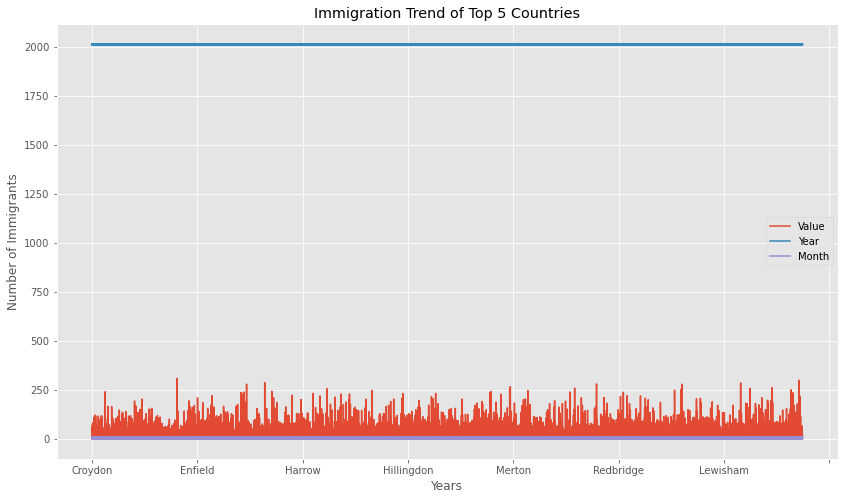

In [31]:
# memplot garis data mentah namun tidak bisa disimpulkan 
df_can.plot(kind='line', figsize=(14, 8))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [19]:
# Melihat ringkasan singkat dari setiap kolom dalam kerangka data kita menggunakan metode describe().
df_can.describe()

Value          Year         Month
count  1.349060e+07  1.349060e+07  1.349060e+07
mean   4.779444e-01  2.012000e+03  6.500000e+00
std    1.771513e+00  2.581989e+00  3.452053e+00
min    0.000000e+00  2.008000e+03  1.000000e+00
25%    0.000000e+00  2.010000e+03  3.750000e+00
50%    0.000000e+00  2.012000e+03  6.500000e+00
75%    1.000000e+00  2.014000e+03  9.250000e+00
max    3.090000e+02  2.016000e+03  1.200000e+01

In [24]:
# Melihat di region barnet 
Barnet = df_can.loc['Barnet']
print(Barnet)

       Police Code               Crime Category  \
Region                                            
Barnet   E01000280           Theft and Handling   
Barnet   E01000172  Violence Against the Person   
Barnet   E01000223  Violence Against the Person   
Barnet   E01000233                      Robbery   
Barnet   E01000228                        Drugs   
...            ...                          ...   
Barnet   E01000125                        Drugs   
Barnet   E01000123                      Robbery   
Barnet   E01000239           Theft and Handling   
Barnet   E01000224           Theft and Handling   
Barnet   E01000193              Criminal Damage   

              Specific Crime Category  Value  Year  Month  
Region                                                     
Barnet  Theft/Taking Of Motor Vehicle      0  2014      3  
Barnet                 Other violence      0  2015     12  
Barnet                     Harassment      1  2014      1  
Barnet              Business Propert

In [22]:
# melihat total kejahatann dengan index tahun 
totalkejatahatantahun = data_test['Year'].value_counts()
totalkejatahatantahun 

2016    1498956
2015    1498956
2008    1498956
2012    1498956
2010    1498956
2013    1498956
2014    1498956
2011    1498956
2009    1498956
Name: Year, dtype: int64

In [46]:
#Menampilkan total kejahatan besar berdasarkan kategori per tahun dalam bentuk tabel
Crime_Category = data_test.pivot_table(values='Value', index=['Year'],columns=['Crime Category'], aggfunc=np.sum, fill_value=0)
Crime_Category

Crime Category  Burglary  Criminal Damage  Drugs  Fraud or Forgery  \
Year                                                                 
2008               88092            91872  68804              5325   
2009               90619            85565  60549                 0   
2010               86826            77897  58674                 0   
2011               93315            70914  57550                 0   
2012               93392            62158  51776                 0   
2013               87222            56206  50278                 0   
2014               76053            59279  44435                 0   
2015               70489            62976  39785                 0   
2016               68285            64071  38914                 0   

Crime Category  Other Notifiable Offences  Robbery  Sexual Offences  \
Year                                                                  
2008                                10112    29627             1273   
2009                                10644    29568                0   
2010                                10768    32341                0   
2011                                10264    36679                0   
2012                                10675    35260                0   
2013                                10811    29337                0   
2014                                13037    22150                0   
2015                                14229    21383                0   
2016                                15809    22528                0   

Crime Category  Theft and Handling  Violence Against the Person  
Year                                                             
2008                        283692                       159844  
2009                        279492                       160777  
2010                        290924                       157894  
2011                        309292                       146901  
2012                        334054                       150014  
2013                        306372                       146181  
2014                        279880                       185349  
2015                        284022                       218740  
2016                        294133                       232381

In [36]:
#Menampilkan total kejahatan kecil berdasarkan kategori per tahun dalam bentuk tabel
Specific_Crime_Category = df_can.pivot_table(values='Value', index=['Year'],columns=['Specific Crime Category'], aggfunc=np.sum, fill_value=0)
Specific_Crime_Category

Specific Crime Category  Assault with Injury  Burglary in Other Buildings  \
Year                                                                        
2008                                   56586                        31437   
2009                                   55297                        30434   
2010                                   54173                        29703   
2011                                   50768                        30876   
2012                                   50369                        31676   
2013                                   39929                        30685   
2014                                   45677                        27078   
2015                                   48164                        25833   
2016                                   50038                        25289   

Specific Crime Category  Burglary in a Dwelling  Business Property  \
Year                                                                 
2008                                      56655               2964   
2009                                      60185               3115   
2010                                      57123               3041   
2011                                      62439               2685   
2012                                      61716               2450   
2013                                      56537               2026   
2014                                      48975               1642   
2015                                      44656               1718   
2016                                      42996               1654   

Specific Crime Category  Common Assault  Counted per Victim  \
Year                                                          
2008                              37356                3840   
2009                              39671                   0   
2010                              41591                   0   
2011                              40502                   0   
2012                              39246                   0   
2013                              37882                   0   
2014                              51244                   0   
2015                              61758                   0   
2016                              64440                   0   

Specific Crime Category  Criminal Damage To Dwelling  \
Year                                                   
2008                                           23519   
2009                                           22475   
2010                                           20253   
2011                                           18037   
2012                                           15330   
2013                                           13512   
2014                                           13391   
2015                                           13648   
2016                                           13951   

Specific Crime Category  Criminal Damage To Motor Vehicle  \
Year                                                        
2008                                                41693   
2009                                                36621   
2010                                                32907   
2011                                                29494   
2012                                                25777   
2013                                                23452   
2014                                                24137   
2015                                                25595   
2016                                                25787   

Specific Crime Category  Criminal Damage To Other Building  Drug Trafficking  \
Year                                                                           
2008                                                  9011              4203   
2009                                                  8348              4172   
2010                                                  7962              4252  

In [34]:
# For a full listing of colors available in Matplotlib, run the following code in your python shell:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


# Area Plot 
##### Specific Crime Category in Landon 2008 - 2016
# Crime Category Data

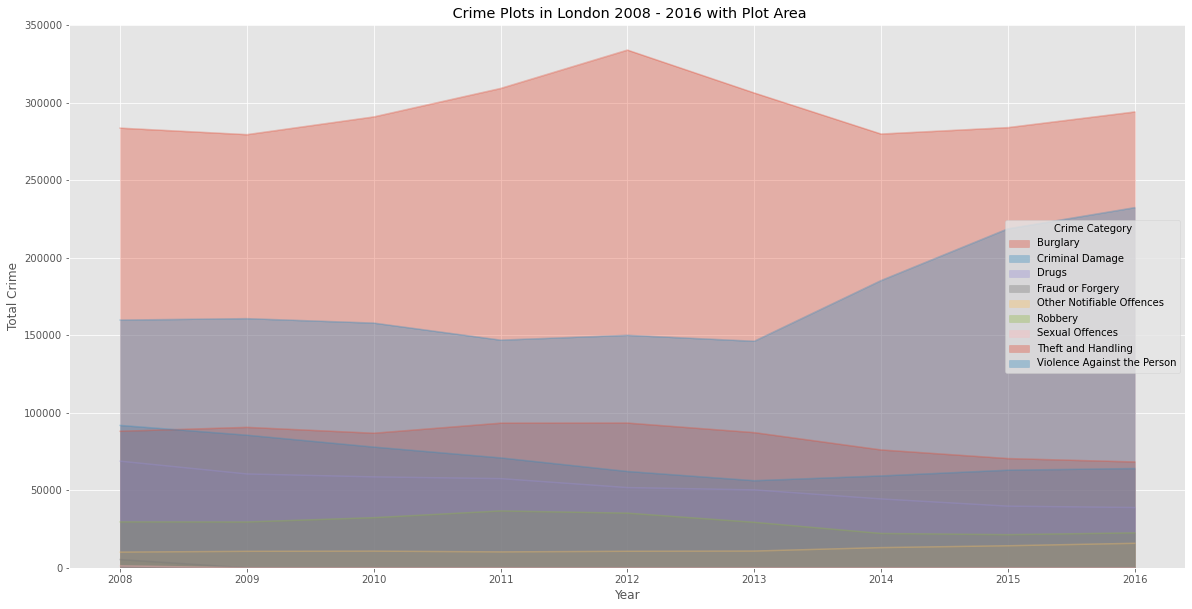

In [47]:
Crime_Category.plot(kind='area',
           alpha=0.35,
           stacked=False,
           figsize=(20, 10),
          )

plt.title(' Crime Plots in London 2008 - 2016 with Plot Area')
plt.ylabel('Total Crime') 
plt.xlabel('Year') 

plt.show()

# Spesific Crime Category Data

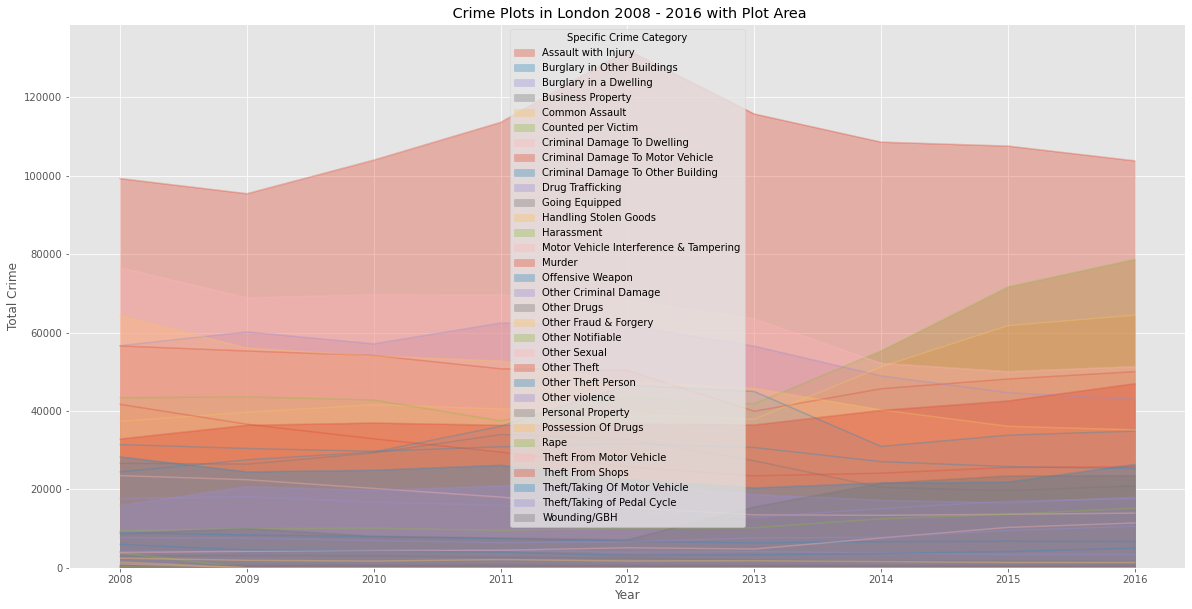

In [48]:
Specific_Crime_Category.plot(kind='area',
           alpha=0.35,
           stacked=False,
           figsize=(20, 10),
          )

plt.title(' Crime Plots in London 2008 - 2016 with Plot Area')
plt.ylabel('Total Crime') 
plt.xlabel('Year') 

plt.show()

# Kesimpulan untuk Area Plot

#### Crime Category ( Major )
1. Kejahatan **Burglary** paling banyak sepanjang tahun
2. Kejahatan **Burglary** terbanyak pada tahun 2012 yaitu lebih dari 300000
3. Kejahatan **Crime Damage** terbanyak pada tahun 2016 yaitu lebih dari 300000

#### Specific Crime Category ( Minor ) 
1. Kejahatan **Assault with injury** terbanyak pertama pada 2008 - 2016 dibandingkan Specific Crime Category lainya.
2. Kejahatan **Assault with injury** terbanyak pada tahun 2012

# Histograms
Pada plot dibawah ini dipergunakan plot histogram. Plot histogram dapat memudahkan kita dalam melihat dari sisi jumlah.

### Crime Category ( Major )

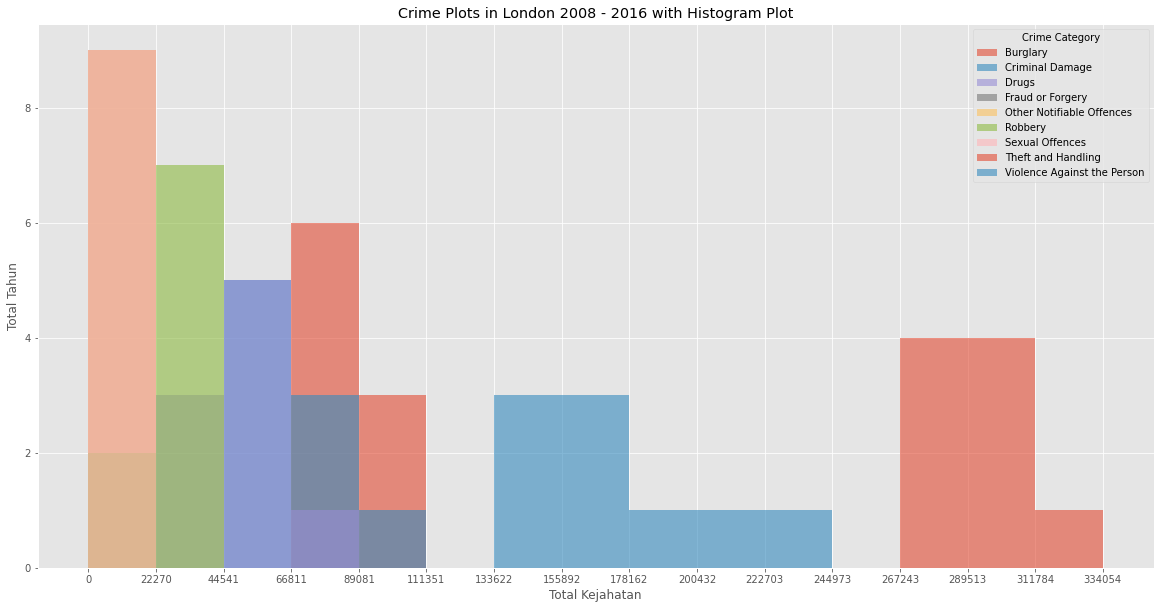

In [49]:
count, bin_edges = np.histogram(Crime_Category, 15)
Crime_Category.plot(kind ='hist', figsize=(20, 10), bins=15, alpha=0.6, xticks=bin_edges,)

plt.title('Crime Plots in London 2008 - 2016 with Histogram Plot') 
plt.ylabel('Total Tahun') 
plt.xlabel('Total Kejahatan')

plt.show()

### Specific Crime Category


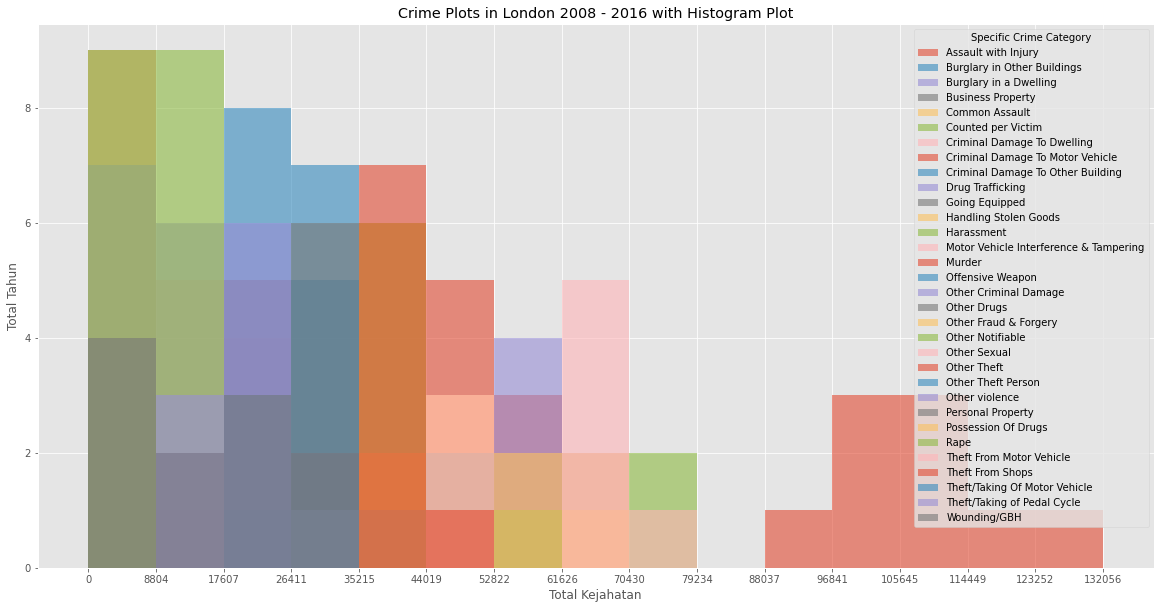

In [50]:
count, bin_edges = np.histogram(Specific_Crime_Category, 15)
Specific_Crime_Category.plot(kind ='hist', figsize=(20, 10), bins=15, alpha=0.6, xticks=bin_edges,)

plt.title('Crime Plots in London 2008 - 2016 with Histogram Plot') 
plt.ylabel('Total Tahun') 
plt.xlabel('Total Kejahatan')

plt.show()

# Kesimpulan untuk Plot Histogram

#### Crime Category ( Major )
1. Kejahatan **Theft and Handling** paling banyak sepanjang tahun
2. Kejahatan **Sexual Offences** paling sedikit sepanjang tahun

#### Specific Crime Category ( Minor ) 
1. Kejahatan **Other Theft** paling banyak sepanjang tahun
2. Kejahatan **Personal Property** paling sedikit sepanjang tahun


# Bar Charts 
Soal: Kasus kejahatan di City of London pada tahun 2016

In [72]:
region =  df_can.pivot_table(values='Value', index=['Month'],columns=['Region'], aggfunc=np.sum, fill_value=0)
region

Region  Barking and Dagenham  Barnet  Bexley  Brent  Bromley  Camden  \
Month                                                                  
1                      12610   17550    9576  18744    15770   22288   
2                      12193   16659    8959  17535    14684   21332   
3                      13451   18447   10133  19296    15843   24027   
4                      12323   17421    9179  18026    14714   22305   
5                      12844   17999    9903  19718    15785   24181   
6                      12451   17908    9492  19342    15159   23514   
7                      13205   18297    9805  19698    16164   24133   
8                      12315   16775    9063  18478    14703   21900   
9                      11883   16902    9053  18184    14616   21731   
10                     12203   18398    9783  20189    15757   24125   
11                     12572   18523    9929  20033    15749   23639   
12                     11397   17312    9261  18308    15405   21972   

Region  City of London  Croydon  Ealing  Enfield  ...  Merton  Newham  \
Month                                             ...                   
1                   58    22198   20398    15888  ...    9595   21612   
2                   56    19986   19629    15667  ...    9067   20462   
3                   49    22015   21401    16966  ...    9929   22749   
4                   53    20954   20416    15731  ...    9372   20887   
5                   61    22169   22067    16680  ...   10036   21901   
6                   52    22376   21753    16683  ...    9915   21967   
7                   53    22629   22557    16628  ...   10205   22758   
8                   75    21623   20806    15445  ...    9259   21683   
9                   90    21255   20249    15447  ...    9274   21345   
10                  70    22013   21687    16743  ...    9943   23191   
11                  74    22290   20973    16497  ...    9991   22628   
12                  89    20786   19626    15505  ...    9068   20841   

Region  Redbridge  Richmond upon Thames  Southwark  Sutton  Tower Hamlets  \
Month                                                                       
1           15637                  7843      22776    8241          17762   
2           14521                  7315      21518    8043          16958   
3           16282                  8279      23301    8970          18988   
4           14574                  7905      22248    8498          18322   
5           15359                  8819      24127    8669          19821   
6           15195                  8375      24205    8822          19848   
7           15517                  8498      24553    8557          21406   
8           14410                  7911      23847    7933          19589   
9           14725                  8231      22926    8050          19040   
10          16170                  8156      24195    8613          20176   
11          16383                  7948      23469    8469          19280   
12          14789                  7491      21644    8122          17423   

Region  Waltham Forest  Wandsworth  Westminster  
Month                                            
1                16792       16402        37928  
2                15673       15902        34713  
3                17396       17370        38349  
4                16748       16464        35934  
5                17669       17690        37661  
6                17962       17687        37216  
7                17927       18387        40293  
8                16939       16765        38090  
9                16619       17306        35608  
10               17212       18067        39483  
11               16993       16972        39412  
12               15949       15729        40341  

[12 rows x 33 columns]

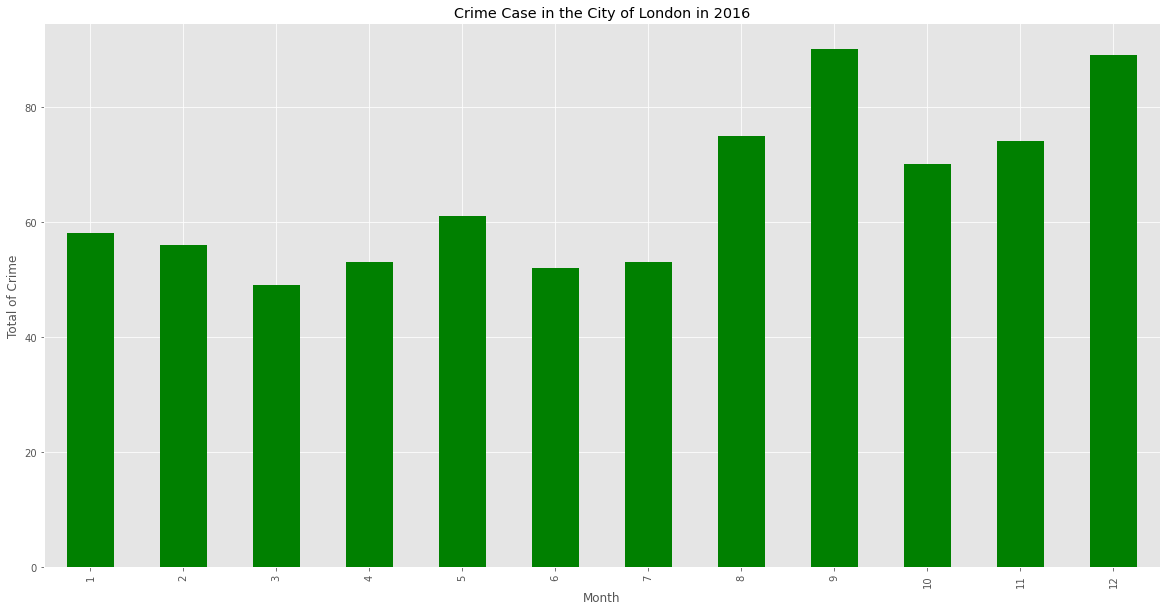

In [78]:
region =  df_can.pivot_table(values='Value', index=['Month'],columns=['Region'], aggfunc=np.sum, fill_value=0)
dfregion = region['City of London']
dfregion.plot(kind='bar', figsize=(20,10), color='green')

plt.xlabel('Month')
plt.ylabel('Total of Crime')
plt.title('Crime Case in the City of London in 2016')

plt.show()

**Kesimpulan** : Berdasarkan Bar Plot diatas pada bulan ke-9 merupakan bulan terbanyak kasus kejahatannya.

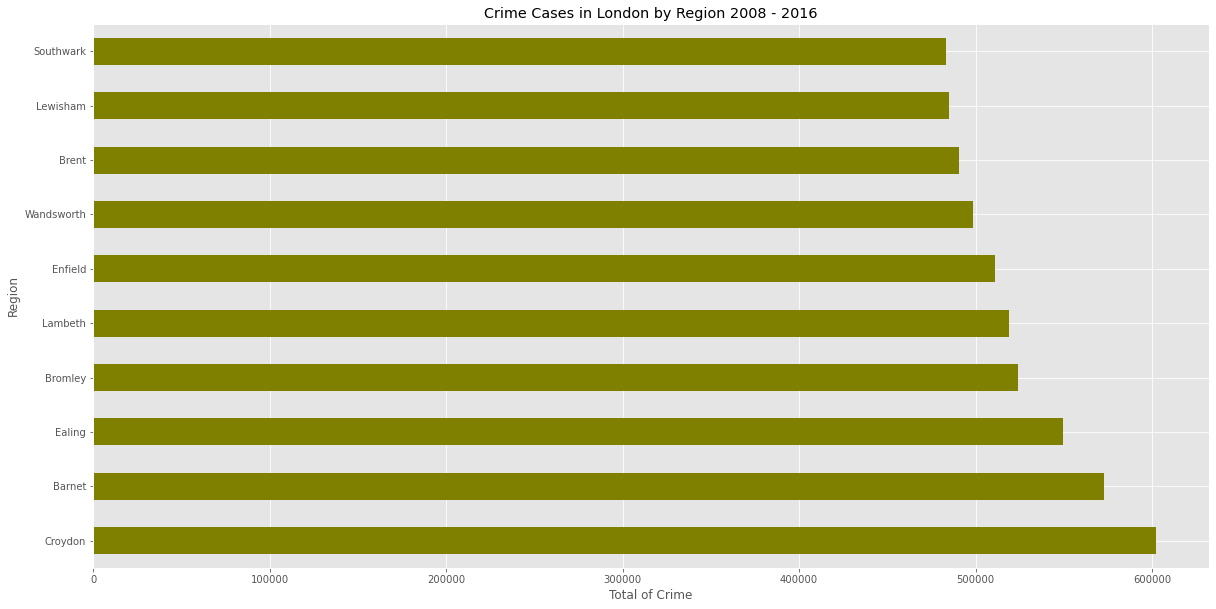

In [80]:
totalborough = df_can['Region'].value_counts()
barh=totalborough[0:10]

barh.plot(kind='barh', figsize=(20,10), color='olive')

plt.xlabel('Total of Crime')
plt.ylabel('Region')
plt.title('Crime Cases in London by Region 2008 - 2016')

plt.show()


**Kesimpulan** : Berdasarkan Bar Plot diatas pada Region Croydon merupakan Region terbanyak kasus kejahatannya.

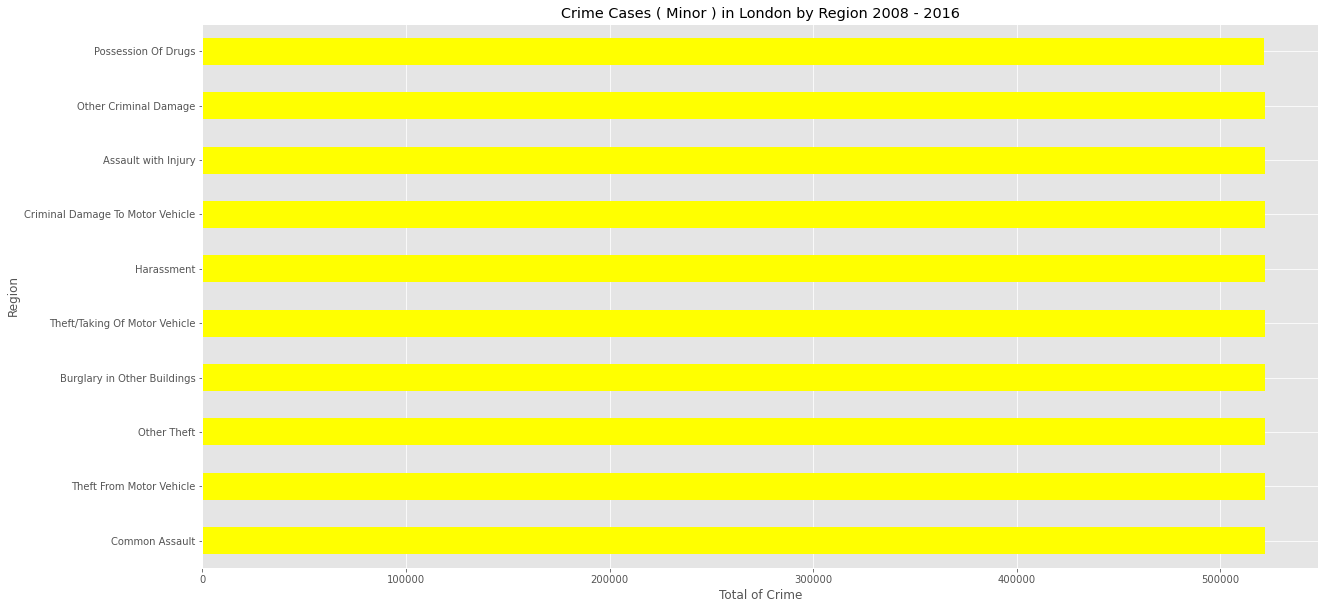

In [82]:
minor1 = df_can['Specific Crime Category'].value_counts()
minor2=minor1[0:10]

minor2.plot(kind='barh', figsize=(20,10), color='yellow')

plt.xlabel('Total of Crime')
plt.ylabel('Region')
plt.title('Crime Cases ( Minor ) in London by Region 2008 - 2016')

plt.show()



**Kesimpulan** : Untuk plot bar diatas sulit disimpulkan karena perbedaannya tidak signifikan.

# Pie Charts

In [85]:
totalcrimes = df_can['Year'].value_counts()
years = pd.DataFrame(data=totalcrimes.index, columns=["Year"])
years['Values'] = totalcrimes.values

In [86]:
fig = px.pie(years, values='Values', names='Year', color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()


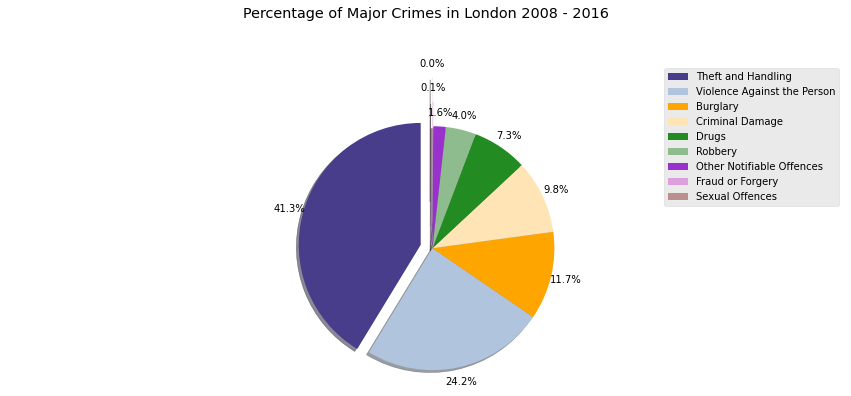

In [87]:
colors_list = ['darkslateblue','lightsteelblue','orange','moccasin','forestgreen','darkseagreen','darkorchid','plum','rosybrown']
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.2, 0.4]
dfpie = df_can.groupby(['Crime Category']).sum()['Value'].sort_values(ascending=False)
dfpie.plot(kind='pie',
           figsize=(15, 6),
           autopct='%1.1f%%',
           startangle=90,
           shadow=True,
           labels=None, 
           colors=colors_list,
           pctdistance=1.12,
           explode=explode_list
          )
plt.title('Percentage of Major Crimes in London 2008 - 2016', y=1.12)
plt.ylabel('')
plt.axis('equal')

plt.legend(labels=dfpie.index, loc='upper right')

plt.show()

**Kesimpulan** : Berdasarkan Pie Plot diatas Theft and Handling memiliki persentase terbesar dari kasus kejahatan lainnya..

# Box Plot

<AxesSubplot:>

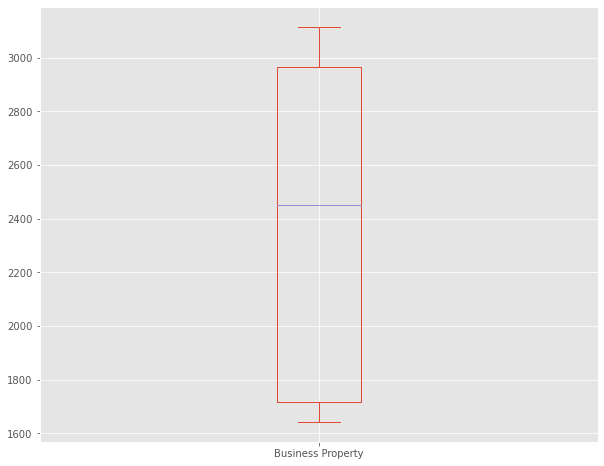

In [90]:
harassment = Specific_Crime_Category['Business Property']
harassment.plot(kind='box', figsize=(10, 8))

**Kesimpulan** : Berdasarkan hasil dari box plot di atas, maka dapat disimpulkan bahwa kasus business property yang terjadi di London terjadi maksimal sebanyak 2600 kasus

# Scatter Plots

In [93]:
dfscatter = Crime_Category[['Robbery','Violence Against the Person']]
dfscatter = dfscatter.reset_index()
dfscatter

Crime Category  Year  Robbery  Violence Against the Person
0               2008    29627                       159844
1               2009    29568                       160777
2               2010    32341                       157894
3               2011    36679                       146901
4               2012    35260                       150014
5               2013    29337                       146181
6               2014    22150                       185349
7               2015    21383                       218740
8               2016    22528                       232381

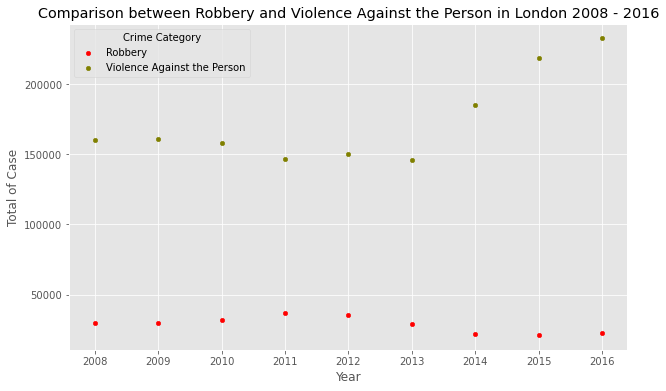

In [95]:
ax1 = dfscatter.plot(kind='scatter', x='Year', y='Robbery', figsize=(10, 6), color='red', label='Robbery')
ax2 = dfscatter.plot(kind='scatter', x='Year', y='Violence Against the Person', figsize=(10, 6), color='olive',label='Violence Against the Person', ax=ax1 )

plt.title('Comparison between Robbery and Violence Against the Person in London 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Total of Case')

plt.show()

**Kesimpulan** :Berdasarkan dari scatter plot di atas, maka dapat disimpulkan bahwa kejahatan jenis Robbery yang ditunjukkan dengan warna red terjadi kurang dari 50000 kasus tiap tahunnya. Sedangkan untuk kasus Violence Againts the Person yang ditunjukkan dengan warna olive tercatat terjadi sebanyak lebih dari 14000 kasus tiap tahunnya.

# Word Clouds

In [37]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

In [38]:
dataregion = ' '.join(df_can.Region)

In [39]:
region_wc = WordCloud(
background_color='white',
max_words=100,
stopwords=stopwords
)

# generate the word cloud
region_wc.generate(dataregion)


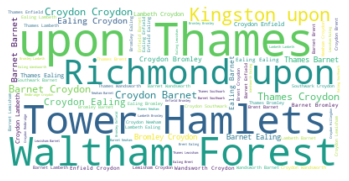

In [40]:
plt.imshow(region_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
uper = np.array(Image.open('trat.png'))

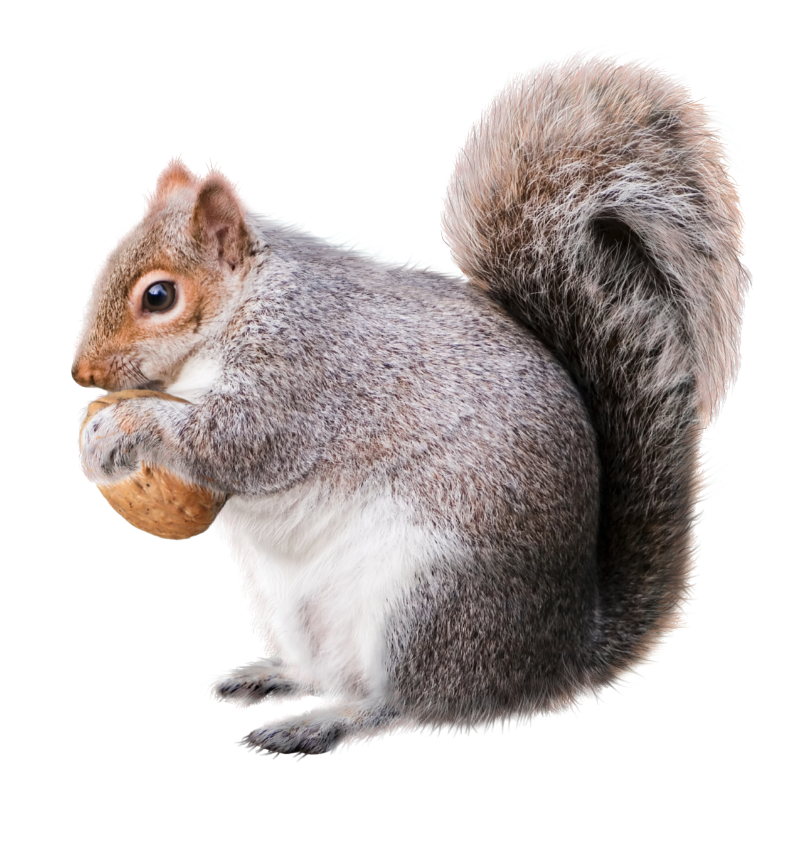

In [53]:
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(uper,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

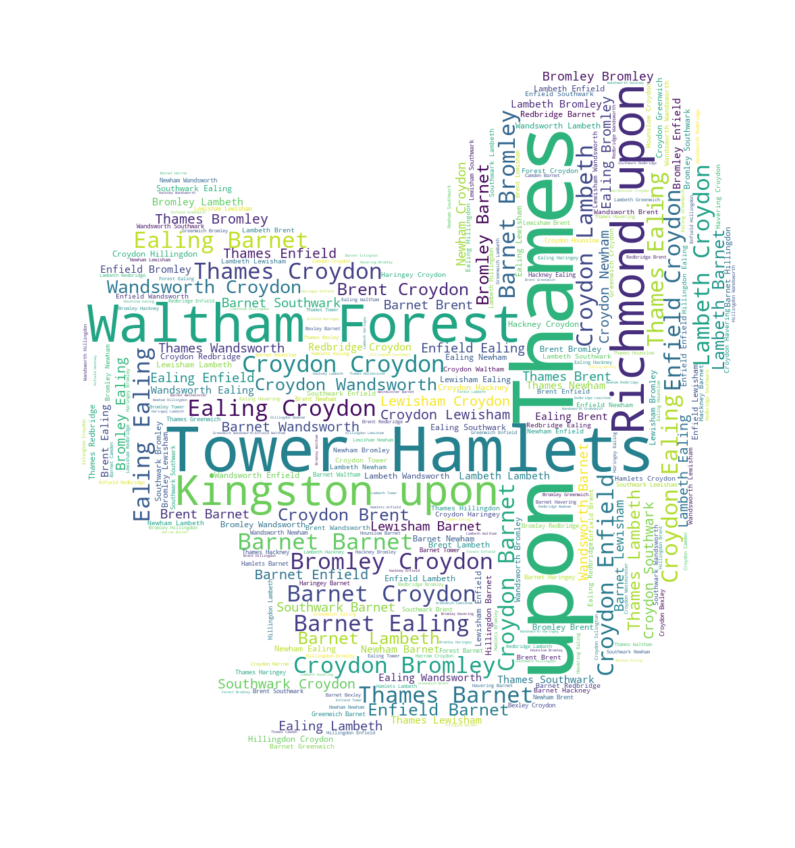

In [54]:
minor_wc = WordCloud(background_color='white', max_words=300,
                    mask=uper, stopwords=stopwords)

minor_wc.generate(dataregion)

fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(minor_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

# Folium Maps

In [44]:
latitude = 51.50
longitude = -0.136

In [45]:
london_map = folium.Map(location=[latitude,longitude], zoom_start=12)
london_map